## Importações

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [62]:
data = pd.read_csv('raw_data/HDR21-22_Composite_indices_complete_time_series.csv')

In [63]:
data.head()


,iso3,country,hdicode,region,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,...,mf_2012,mf_2013,mf_2014,mf_2015,mf_2016,mf_2017,mf_2018,mf_2019,mf_2020,mf_2021
0,AFG,Afghanistan,Low,SA,180.0,0.273,0.279,0.287,0.297,0.292,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,...,4.09,4.53,3.97,3.59,2.79,2.64,2.28,2.18,2.18,2.18
2,ALB,Albania,High,ECA,67.0,0.647,0.629,0.614,0.617,0.624,...,12.44,11.49,13.14,12.61,14.39,14.46,12.85,12.96,12.96,12.96
3,AND,Andorra,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Very High,AS,26.0,0.728,0.739,0.742,0.748,0.755,...,49.56,49.68,55.49,59.76,64.95,75.61,65.97,68.95,68.95,68.95


In [64]:
data.describe()

,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,hdi_1995,hdi_1996,hdi_1997,hdi_1998,...,mf_2012,mf_2013,mf_2014,mf_2015,mf_2016,mf_2017,mf_2018,mf_2019,mf_2020,mf_2021
count,191.000000,152.000000,152.000000,152.000000,152.000000,152.000000,163.000000,163.000000,163.000000,163.000000,...,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,95.811518,0.595112,0.597862,0.600493,0.604474,0.609329,0.613908,0.619663,0.624975,0.630417,...,15.249784,15.385926,15.347629,15.352632,15.342119,15.491780,14.597416,14.776332,14.775408,14.774396
std,55.307333,0.161918,0.161921,0.162193,0.163122,0.163818,0.162789,0.163461,0.164299,0.165177,...,14.134572,14.555342,14.363092,14.680340,15.015809,15.333709,13.581871,14.266308,14.266504,14.266706
min,1.000000,0.216000,0.218000,0.222000,0.227000,0.232000,0.238000,0.243000,0.248000,0.256000,...,0.430000,0.420000,0.450000,0.560000,0.600000,0.610000,0.500000,0.470000,0.470000,0.470000
25%,48.500000,0.477750,0.477000,0.475250,0.474250,0.476500,0.480500,0.488500,0.490000,0.492000,...,4.597500,4.525000,4.452375,4.457500,4.517500,4.575000,4.612500,4.732500,4.732500,4.732500
50%,96.000000,0.621500,0.623500,0.622000,0.624000,0.623500,0.642000,0.650000,0.651000,0.657000,...,10.907725,11.272314,10.745000,10.260000,10.590000,10.895000,11.215000,11.030000,11.030000,11.030000
75%,143.500000,0.725500,0.727000,0.723750,0.724250,0.733750,0.737000,0.743000,0.752500,0.759000,...,20.345000,20.397500,20.227500,20.187500,19.350000,19.757500,18.432500,17.932500,17.932500,17.932500
max,191.000000,0.872000,0.873000,0.878000,0.880000,0.884000,0.885000,0.887000,0.890000,0.895000,...,74.560000,82.970000,81.100000,86.780000,83.510000,88.700000,71.160000,85.700000,85.700000,85.700000


In [65]:
data.shape[0]

206

In [66]:
y_one = pd.read_csv('raw_data/global-hunger-index.csv')

In [67]:
y_one.head()

,Entity,Code,Year,Global Hunger Index (2021),411773-annotations
0,Afghanistan,AFG,2000,50.9,NaN
1,Afghanistan,AFG,2006,42.7,NaN
2,Afghanistan,AFG,2012,34.3,NaN
3,Afghanistan,AFG,2021,28.3,NaN
4,Albania,ALB,2000,20.7,NaN


In [68]:
y_one.shape[0]

471

In [69]:
y_one = y_one.drop(columns=['411773-annotations'])

In [70]:
np.unique(y_one['Entity'])

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Benin',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Democratic Republic of Congo', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Georgia',
       'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica',
       'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos',
       'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania',
       'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania',
       'Mauritius', 'Mexico',

In [71]:
data_GHI = pd.read_excel('raw_data/GHI_ds2.xlsx')

In [72]:
data_GHI.head()

,Country,2000,2007,2014,2022
0,Belarus,5.0,5.0,5.0,5.0
1,Bosnia and Herzegovina,9.3,6.6,5.0,5.0
2,Chile,5.0,5.0,5.0,5.0
3,China,13.3,7.8,5.0,5.0
4,Croatia,5.0,5.0,5.0,5.0


In [73]:
data_GHI.sort_values(by='Country')

,Country,2000,2007,2014,2022
108,Afghanistan,50.3,38.7,30.6,29.9
26,Albania,20.7,15.8,9.2,6.2
31,Algeria,14.5,11.4,8.7,6.9
97,Angola,64.9,44.7,26.2,25.9
30,Argentina,6.6,5.5,5.0,6.8
...,...,...,...,...,...
20,Uzbekistan,24.2,15.4,8.3,5.6
84,Venezuela,14.6,10.1,8.1,19.9
54,Viet Nam,26.3,21.4,15.4,11.9
120,Yemen,41.3,38.4,41.7,45.1


In [75]:
colunas_ano = ['2007', '2014']
df_melted = data_GHI.melt(id_vars='Country', value_vars=colunas_ano, var_name='ano', value_name='GHI')

df_melted.sort_values(by='Country')

,Country,ano,GHI
229,Afghanistan,2014,30.6
108,Afghanistan,2007,38.7
147,Albania,2014,9.2
26,Albania,2007,15.8
152,Algeria,2014,8.7
...,...,...,...
175,Viet Nam,2014,15.4
120,Yemen,2007,38.4
241,Yemen,2014,41.7
107,Zambia,2007,46.0


In [76]:
df_melted['ano'] = df_melted['ano'].astype('Int64')

In [77]:
df_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  242 non-null    object 
 1   ano      242 non-null    Int64  
 2   GHI      241 non-null    float64
dtypes: Int64(1), float64(1), object(1)
memory usage: 6.0+ KB


In [78]:
df_melted.rename(columns={'Country': 'Entity'}, inplace=True)
df_melted.rename(columns={'ano': 'Year'}, inplace=True)
df_melted.rename(columns={'GHI': 'Global Hunger Index (2021)'}, inplace=True)

In [79]:
df_melted.sort_values(by='Entity')

,Entity,Year,Global Hunger Index (2021)
229,Afghanistan,2014,30.6
108,Afghanistan,2007,38.7
147,Albania,2014,9.2
26,Albania,2007,15.8
152,Algeria,2014,8.7
...,...,...,...
175,Viet Nam,2014,15.4
120,Yemen,2007,38.4
241,Yemen,2014,41.7
107,Zambia,2007,46.0


In [80]:
GHI_1 = pd.merge(df_melted,y_one[['Code','Entity']],on='Entity',how='left')
GHI_1.sort_values(by='Entity')

,Entity,Year,Global Hunger Index (2021),Code
817,Afghanistan,2014,30.6,AFG
388,Afghanistan,2007,38.7,AFG
389,Afghanistan,2007,38.7,AFG
387,Afghanistan,2007,38.7,AFG
386,Afghanistan,2007,38.7,AFG
...,...,...,...,...
426,Yemen,2007,38.4,YEM
425,Yemen,2007,38.4,YEM
857,Yemen,2014,41.7,YEM
385,Zambia,2007,46.0,ZMB


In [82]:
GHI_unique = GHI_1.drop_duplicates()
GHI_unique

,Entity,Year,Global Hunger Index (2021),Code
0,Belarus,2007,5.0,BLR
4,Bosnia and Herzegovina,2007,6.6,BIH
8,Chile,2007,5.0,CHL
12,China,2007,7.8,CHN
16,Croatia,2007,5.0,HRV
...,...,...,...,...
838,Chad,2014,40.7,TCD
842,Democratic Republic of Congo,2014,38.7,COD
846,Madagascar,2014,37.3,MDG
850,Central African Republic,2014,44.6,CAF


In [83]:
y_one

,Entity,Code,Year,Global Hunger Index (2021)
0,Afghanistan,AFG,2000,50.9
1,Afghanistan,AFG,2006,42.7
2,Afghanistan,AFG,2012,34.3
3,Afghanistan,AFG,2021,28.3
4,Albania,ALB,2000,20.7
...,...,...,...,...
466,Yemen,YEM,2006,38.8
467,Yemen,YEM,2012,38.4
468,Yemen,YEM,2021,45.1
469,Zambia,ZMB,2021,27.5


In [84]:
GHI_df = pd.concat([y_one,GHI_unique])

In [85]:
GHI_df.sort_values(by='Entity')

,Entity,Code,Year,Global Hunger Index (2021)
0,Afghanistan,AFG,2000,50.9
1,Afghanistan,AFG,2006,42.7
2,Afghanistan,AFG,2012,34.3
3,Afghanistan,AFG,2021,28.3
386,Afghanistan,AFG,2007,38.7
...,...,...,...,...
854,Yemen,YEM,2014,41.7
469,Zambia,ZMB,2021,27.5
385,Zambia,ZMB,2007,46.0
814,Zambia,ZMB,2014,35.2


In [86]:
linhas_afeganistao = GHI_df.loc[GHI_df['Entity'] == 'Afghanistan']

# Exibindo as linhas correspondentes
print(linhas_afeganistao)

          Entity Code  Year  Global Hunger Index (2021)
0    Afghanistan  AFG  2000                        50.9
1    Afghanistan  AFG  2006                        42.7
2    Afghanistan  AFG  2012                        34.3
3    Afghanistan  AFG  2021                        28.3
386  Afghanistan  AFG  2007                        38.7
815  Afghanistan  AFG  2014                        30.6


In [87]:
print(GHI_df.isnull().sum())

Entity                         0
Code                          22
Year                           0
Global Hunger Index (2021)     1
dtype: int64


In [88]:
registros_nulos = GHI_df[GHI_df.isnull().any(axis=1)]

# Imprimir os registros nulos
np.unique(registros_nulos['Entity'])

array(['Cabo Verde', "Côte d'Ivoire", 'Hungary', 'Kyrgyz Republic',
       'Lao PDR', 'Russian Federation', 'Slovak Republic', 'Sudan',
       'Timor-Leste', 'Türkiye', 'United Arab Emirates', 'Viet Nam'],
      dtype=object)

In [89]:
np.unique(y_one[['Entity']])

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Benin',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Democratic Republic of Congo', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Gabon', 'Gambia', 'Georgia',
       'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Iran', 'Iraq', 'Jamaica',
       'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Kyrgyzstan', 'Laos',
       'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania',
       'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Mauritania',
       'Mauritius', 'Mexico',

In [90]:
codigo_iso3 = {
    'Cabo Verde': 'CPV',
    "Côte d'Ivoire": 'CIV',
    'Hungary': 'HUN',
    'Kyrgyz Republic': 'KGZ',
    'Lao PDR': 'LAO',
    'Russian Federation': 'RUS',
    'Slovak Republic': 'SVK',
    'Sudan': 'SDN',
    'Timor-Leste': 'TLS',
    'Türkiye': 'TUR',
    'United Arab Emirates': 'ARE',
    'Viet Nam': 'VNM'
}

GHI_df['Code'] = GHI_df['Entity'].map(codigo_iso3).fillna(GHI_df['Code'])
print(GHI_df.isnull().sum(), GHI_df.shape)

Entity                        0
Code                          0
Year                          0
Global Hunger Index (2021)    1
dtype: int64 (713, 4)


In [91]:
GHI_df = GHI_df.dropna(subset=['Global Hunger Index (2021)'], axis=0, how='any', inplace=False)
print(GHI_df.isnull().sum())

Entity                        0
Code                          0
Year                          0
Global Hunger Index (2021)    0
dtype: int64


In [92]:
GHI_df.shape

(712, 4)

In [93]:
y = GHI_df.copy()

In [94]:
y.shape

(712, 4)

In [95]:
linhas_2014 = y.loc[y['Year'] == 2014]

# Exibindo as linhas correspondentes
print(linhas_2014)

                           Entity Code  Year  Global Hunger Index (2021)
429                       Belarus  BLR  2014                         5.0
433        Bosnia and Herzegovina  BIH  2014                         5.0
437                         Chile  CHL  2014                         5.0
441                         China  CHN  2014                         5.0
445                       Croatia  HRV  2014                         5.0
..                            ...  ...   ...                         ...
838                          Chad  TCD  2014                        40.7
842  Democratic Republic of Congo  COD  2014                        38.7
846                    Madagascar  MDG  2014                        37.3
850      Central African Republic  CAF  2014                        44.6
854                         Yemen  YEM  2014                        41.7

[121 rows x 4 columns]


In [96]:
y.sort_values(by='Entity')

,Entity,Code,Year,Global Hunger Index (2021)
0,Afghanistan,AFG,2000,50.9
1,Afghanistan,AFG,2006,42.7
2,Afghanistan,AFG,2012,34.3
3,Afghanistan,AFG,2021,28.3
386,Afghanistan,AFG,2007,38.7
...,...,...,...,...
854,Yemen,YEM,2014,41.7
469,Zambia,ZMB,2021,27.5
385,Zambia,ZMB,2007,46.0
814,Zambia,ZMB,2014,35.2


In [97]:
linhas_afeganistao = y.loc[GHI_df['Entity'] == 'Afghanistan']

# Exibindo as linhas correspondentes
print(linhas_afeganistao)

          Entity Code  Year  Global Hunger Index (2021)
0    Afghanistan  AFG  2000                        50.9
1    Afghanistan  AFG  2006                        42.7
2    Afghanistan  AFG  2012                        34.3
3    Afghanistan  AFG  2021                        28.3
386  Afghanistan  AFG  2007                        38.7
815  Afghanistan  AFG  2014                        30.6


In [98]:
print(data.columns)

Index(['iso3', 'country', 'hdicode', 'region', 'hdi_rank_2021', 'hdi_1990',
       'hdi_1991', 'hdi_1992', 'hdi_1993', 'hdi_1994',
       ...
       'mf_2012', 'mf_2013', 'mf_2014', 'mf_2015', 'mf_2016', 'mf_2017',
       'mf_2018', 'mf_2019', 'mf_2020', 'mf_2021'],
      dtype='object', length=1008)


In [99]:
anos = [2000,2006,2007,2012,2014,2021]
indicadores = ['hdi','le','eys','mys','gnipc','gdi','hdi_f','le_f','eys_f','mys_f','gni_pc_f','hdi_m','le_m','eys_m','mys_m','gni_pc_m','gii','mmr','abr','se_f','se_m','pr_f','pr_m','lfpr_f','lfpr_m','phdi','diff_hdi_phdi','co2_prod','mf']
df = {
    'iso3':[],
    'year':[]
}

for indicador in range(len(indicadores)): 
    df[indicadores[indicador]] = []
    

for i in data.iterrows():
    for ano in anos:
        df['iso3'].append(i[1]['iso3'])
        df['year'].append(ano)
        for idx,indicador in enumerate(indicadores):
            df[indicador].append(i[1][f'{indicadores[idx]}_{ano}'])
X = pd.DataFrame(df)
X
    

,iso3,year,hdi,le,eys,mys,gnipc,gdi,hdi_f,le_f,...,se_f,se_m,pr_f,pr_m,lfpr_f,lfpr_m,phdi,diff_hdi_phdi,co2_prod,mf
0,AFG,2000,0.335,55.297800,5.529050,1.407806,984.997434,0.515,0.203937,56.857900,...,1.367468,6.764376,NaN,NaN,14.795000,76.646000,0.331,1.194030,0.036462,2.280000
1,AFG,2006,0.409,58.684400,7.926956,1.776703,1518.767846,0.560,0.270040,60.243100,...,1.887654,9.458985,25.925926,74.074074,15.455000,76.422000,0.406,0.733496,0.061870,1.530000
2,AFG,2007,0.424,59.111300,8.193494,1.858825,1811.166659,0.587,0.290083,60.909000,...,1.862680,10.056637,25.872093,74.127907,15.275000,76.567000,0.421,0.707547,0.083711,1.530000
3,AFG,2012,0.466,61.923000,9.577323,2.209473,2125.862821,0.649,0.344152,63.513500,...,2.229978,12.966910,27.635328,72.364672,15.879000,76.420000,0.461,1.072961,0.327922,1.860000
4,AFG,2014,0.479,62.545100,10.174350,2.313755,2178.507021,0.630,0.343466,64.274300,...,2.672197,14.084226,27.635328,72.364672,17.749000,74.737000,0.474,1.043841,0.232967,1.660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1231,ZZK.WORLD,2006,0.679,69.568630,11.116116,7.499668,12841.504330,0.930,0.651735,72.057427,...,50.919808,60.802348,16.796116,83.203884,50.104872,76.753801,0.623,8.247423,4.426763,10.655901
1232,ZZK.WORLD,2007,0.684,69.827548,11.311314,7.552041,13302.992940,0.932,0.658006,72.334431,...,51.688045,61.436740,17.638502,82.361498,49.893809,76.526394,0.627,8.333333,4.499025,10.961865
1233,ZZK.WORLD,2012,0.709,71.289119,12.106047,7.981302,14356.941280,0.944,0.686913,73.794031,...,56.907854,65.423955,20.291811,79.708189,48.194490,75.158865,0.644,9.167842,4.708761,12.186601
1234,ZZK.WORLD,2014,0.720,71.886202,12.419588,8.166999,14985.568050,0.949,0.698956,74.361617,...,59.454507,67.107052,21.624375,78.375625,47.863707,74.524653,0.654,9.166667,4.674574,12.520563


In [100]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   iso3           1236 non-null   object 
 1   year           1236 non-null   int64  
 2   hdi            1184 non-null   float64
 3   le             1236 non-null   float64
 4   eys            1206 non-null   float64
 5   mys            1188 non-null   float64
 6   gnipc          1220 non-null   float64
 7   gdi            1067 non-null   float64
 8   hdi_f          1067 non-null   float64
 9   le_f           1236 non-null   float64
 10  eys_f          1169 non-null   float64
 11  mys_f          1112 non-null   float64
 12  gni_pc_f       1137 non-null   float64
 13  hdi_m          1067 non-null   float64
 14  le_m           1236 non-null   float64
 15  eys_m          1169 non-null   float64
 16  mys_m          1112 non-null   float64
 17  gni_pc_m       1137 non-null   float64
 18  gii     

In [101]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 854
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Entity                      712 non-null    object 
 1   Code                        712 non-null    object 
 2   Year                        712 non-null    Int64  
 3   Global Hunger Index (2021)  712 non-null    float64
dtypes: Int64(1), float64(1), object(2)
memory usage: 28.5+ KB


In [102]:
y

,Entity,Code,Year,Global Hunger Index (2021)
0,Afghanistan,AFG,2000,50.9
1,Afghanistan,AFG,2006,42.7
2,Afghanistan,AFG,2012,34.3
3,Afghanistan,AFG,2021,28.3
4,Albania,ALB,2000,20.7
...,...,...,...,...
838,Chad,TCD,2014,40.7
842,Democratic Republic of Congo,COD,2014,38.7
846,Madagascar,MDG,2014,37.3
850,Central African Republic,CAF,2014,44.6


In [103]:
y['Year'] = y['Year'].astype('Int64')

In [104]:
y['Year'].unique()

<IntegerArray>
[2000, 2006, 2012, 2021, 2007, 2014]
Length: 6, dtype: Int64

In [105]:
X_y = X.merge(y,left_on=['iso3','year'],right_on=['Code','Year'], how= 'inner')
X_y

,iso3,year,hdi,le,eys,mys,gnipc,gdi,hdi_f,le_f,...,lfpr_f,lfpr_m,phdi,diff_hdi_phdi,co2_prod,mf,Entity,Code,Year,Global Hunger Index (2021)
0,AFG,2000,0.335,55.2978,5.529050,1.407806,984.997434,0.515,0.203937,56.8579,...,14.795,76.646,0.331,1.194030,0.036462,2.28,Afghanistan,AFG,2000,50.9
1,AFG,2006,0.409,58.6844,7.926956,1.776703,1518.767846,0.560,0.270040,60.2431,...,15.455,76.422,0.406,0.733496,0.061870,1.53,Afghanistan,AFG,2006,42.7
2,AFG,2007,0.424,59.1113,8.193494,1.858825,1811.166659,0.587,0.290083,60.9090,...,15.275,76.567,0.421,0.707547,0.083711,1.53,Afghanistan,AFG,2007,38.7
3,AFG,2012,0.466,61.9230,9.577323,2.209473,2125.862821,0.649,0.344152,63.5135,...,15.879,76.420,0.461,1.072961,0.327922,1.86,Afghanistan,AFG,2012,34.3
4,AFG,2014,0.479,62.5451,10.174350,2.313755,2178.507021,0.630,0.343466,64.2743,...,17.749,74.737,0.474,1.043841,0.232967,1.66,Afghanistan,AFG,2014,30.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,ZAF,2021,0.713,62.3410,13.643710,11.373160,12948.373250,0.944,0.685864,64.9992,...,46.212,59.883,0.648,9.116410,7.620420,7.55,South Africa,ZAF,2021,12.9
708,ZMB,2007,0.495,52.7389,10.924025,6.158723,2300.748795,0.878,0.461540,53.8693,...,72.446,84.399,0.487,1.616162,0.183501,3.10,Zambia,ZMB,2007,46.0
709,ZMB,2014,0.557,60.6990,10.926787,6.603009,3263.039162,0.941,0.539048,62.7964,...,69.433,79.823,0.546,1.974865,0.316667,3.92,Zambia,ZMB,2014,35.2
710,ZMB,2021,0.565,61.2234,10.928760,7.187091,3217.767739,0.965,0.554427,63.9276,...,69.230,77.847,0.557,1.415929,0.357535,2.38,Zambia,ZMB,2021,27.5


In [106]:
linhas_afeganistao = X_y.loc[X_y['Entity'] == 'Afghanistan']

# Exibindo as linhas correspondentes
print(linhas_afeganistao)

  iso3  year    hdi       le        eys       mys        gnipc    gdi  \
0  AFG  2000  0.335  55.2978   5.529050  1.407806   984.997434  0.515   
1  AFG  2006  0.409  58.6844   7.926956  1.776703  1518.767846  0.560   
2  AFG  2007  0.424  59.1113   8.193494  1.858825  1811.166659  0.587   
3  AFG  2012  0.466  61.9230   9.577323  2.209473  2125.862821  0.649   
4  AFG  2014  0.479  62.5451  10.174350  2.313755  2178.507021  0.630   
5  AFG  2021  0.478  61.9824  10.263844  2.985070  1824.190915  0.681   

      hdi_f     le_f  ...  lfpr_f  lfpr_m   phdi  diff_hdi_phdi  co2_prod  \
0  0.203937  56.8579  ...  14.795  76.646  0.331       1.194030  0.036462   
1  0.270040  60.2431  ...  15.455  76.422  0.406       0.733496  0.061870   
2  0.290083  60.9090  ...  15.275  76.567  0.421       0.707547  0.083711   
3  0.344152  63.5135  ...  15.879  76.420  0.461       1.072961  0.327922   
4  0.343466  64.2743  ...  17.749  74.737  0.474       1.043841  0.232967   
5  0.364840  65.2791  ... 

In [107]:
linhas_2014 = X_y.loc[X_y['year'] == 2014]

# Exibindo as linhas correspondentes
print(linhas_2014)

    iso3  year    hdi       le        eys        mys         gnipc    gdi  \
4    AFG  2014  0.479  62.5451  10.174350   2.313755   2178.507021  0.630   
10   AGO  2014  0.563  60.0397  11.127300   3.990690   7704.231949  0.884   
16   ALB  2014  0.792  78.4075  15.252420  10.370374  11691.648290  0.968   
19   ARE  2014  0.859  79.0442  13.183602  10.506293  62573.505310  0.921   
24   ARG  2014  0.846  76.7549  17.270140  10.908510  23087.869640  0.995   
..   ...   ...    ...      ...        ...        ...           ...    ...   
688  VEN  2014  0.770  72.8533  14.125210   9.511333  18928.272000  1.019   
694  VNM  2014  0.680  73.8545  12.692323   7.957605   5830.685310  1.001   
700  YEM  2014  0.505  67.3842   9.098710   3.000000   2775.842952  0.595   
706  ZAF  2014  0.712  63.3796  13.999910  10.146050  13700.834560  0.978   
709  ZMB  2014  0.557  60.6990  10.926787   6.603009   3263.039162  0.941   

        hdi_f     le_f  ...  lfpr_f  lfpr_m   phdi  diff_hdi_phdi   co2_pro

In [108]:
X_y = X_y.drop(columns=['Year','Code'])

In [109]:
X_y

,iso3,year,hdi,le,eys,mys,gnipc,gdi,hdi_f,le_f,...,pr_f,pr_m,lfpr_f,lfpr_m,phdi,diff_hdi_phdi,co2_prod,mf,Entity,Global Hunger Index (2021)
0,AFG,2000,0.335,55.2978,5.529050,1.407806,984.997434,0.515,0.203937,56.8579,...,NaN,NaN,14.795,76.646,0.331,1.194030,0.036462,2.28,Afghanistan,50.9
1,AFG,2006,0.409,58.6844,7.926956,1.776703,1518.767846,0.560,0.270040,60.2431,...,25.925926,74.074074,15.455,76.422,0.406,0.733496,0.061870,1.53,Afghanistan,42.7
2,AFG,2007,0.424,59.1113,8.193494,1.858825,1811.166659,0.587,0.290083,60.9090,...,25.872093,74.127907,15.275,76.567,0.421,0.707547,0.083711,1.53,Afghanistan,38.7
3,AFG,2012,0.466,61.9230,9.577323,2.209473,2125.862821,0.649,0.344152,63.5135,...,27.635328,72.364672,15.879,76.420,0.461,1.072961,0.327922,1.86,Afghanistan,34.3
4,AFG,2014,0.479,62.5451,10.174350,2.313755,2178.507021,0.630,0.343466,64.2743,...,27.635328,72.364672,17.749,74.737,0.474,1.043841,0.232967,1.66,Afghanistan,30.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,ZAF,2021,0.713,62.3410,13.643710,11.373160,12948.373250,0.944,0.685864,64.9992,...,45.982143,54.017857,46.212,59.883,0.648,9.116410,7.620420,7.55,South Africa,12.9
708,ZMB,2007,0.495,52.7389,10.924025,6.158723,2300.748795,0.878,0.461540,53.8693,...,15.189873,84.810127,72.446,84.399,0.487,1.616162,0.183501,3.10,Zambia,46.0
709,ZMB,2014,0.557,60.6990,10.926787,6.603009,3263.039162,0.941,0.539048,62.7964,...,10.759494,89.240506,69.433,79.823,0.546,1.974865,0.316667,3.92,Zambia,35.2
710,ZMB,2021,0.565,61.2234,10.928760,7.187091,3217.767739,0.965,0.554427,63.9276,...,15.060241,84.939759,69.230,77.847,0.557,1.415929,0.357535,2.38,Zambia,27.5


In [110]:
#fazer um merge com as subregiões de cada país
countries = pd.read_csv('raw_data/countryContinent.csv', encoding='latin-1')

X_with_sub_region = X_y.merge(countries[['sub_region', 'code_3']] ,left_on=['iso3'], right_on=['code_3'])
X_with_sub_region

,iso3,year,hdi,le,eys,mys,gnipc,gdi,hdi_f,le_f,...,lfpr_f,lfpr_m,phdi,diff_hdi_phdi,co2_prod,mf,Entity,Global Hunger Index (2021),sub_region,code_3
0,AFG,2000,0.335,55.2978,5.529050,1.407806,984.997434,0.515,0.203937,56.8579,...,14.795,76.646,0.331,1.194030,0.036462,2.28,Afghanistan,50.9,Southern Asia,AFG
1,AFG,2006,0.409,58.6844,7.926956,1.776703,1518.767846,0.560,0.270040,60.2431,...,15.455,76.422,0.406,0.733496,0.061870,1.53,Afghanistan,42.7,Southern Asia,AFG
2,AFG,2007,0.424,59.1113,8.193494,1.858825,1811.166659,0.587,0.290083,60.9090,...,15.275,76.567,0.421,0.707547,0.083711,1.53,Afghanistan,38.7,Southern Asia,AFG
3,AFG,2012,0.466,61.9230,9.577323,2.209473,2125.862821,0.649,0.344152,63.5135,...,15.879,76.420,0.461,1.072961,0.327922,1.86,Afghanistan,34.3,Southern Asia,AFG
4,AFG,2014,0.479,62.5451,10.174350,2.313755,2178.507021,0.630,0.343466,64.2743,...,17.749,74.737,0.474,1.043841,0.232967,1.66,Afghanistan,30.6,Southern Asia,AFG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,ZAF,2021,0.713,62.3410,13.643710,11.373160,12948.373250,0.944,0.685864,64.9992,...,46.212,59.883,0.648,9.116410,7.620420,7.55,South Africa,12.9,Southern Africa,ZAF
708,ZMB,2007,0.495,52.7389,10.924025,6.158723,2300.748795,0.878,0.461540,53.8693,...,72.446,84.399,0.487,1.616162,0.183501,3.10,Zambia,46.0,Eastern Africa,ZMB
709,ZMB,2014,0.557,60.6990,10.926787,6.603009,3263.039162,0.941,0.539048,62.7964,...,69.433,79.823,0.546,1.974865,0.316667,3.92,Zambia,35.2,Eastern Africa,ZMB
710,ZMB,2021,0.565,61.2234,10.928760,7.187091,3217.767739,0.965,0.554427,63.9276,...,69.230,77.847,0.557,1.415929,0.357535,2.38,Zambia,27.5,Eastern Africa,ZMB


In [111]:
rural_growth = pd.read_csv('raw_data/rpg.csv', encoding='latin-1', sep=';')
rural_growth

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Rural population growth (annual %),SP.RUR.TOTL.ZG,NaN,2.211234,1.577679,1.422600,1.245827,1.065002,...,0.601746,0.520623,0.442423,0.358555,0.287256,0.213237,-0.133220,-0.347205,NaN,NaN
1,Africa Eastern and Southern,AFE,Rural population growth (annual %),SP.RUR.TOTL.ZG,NaN,2.362667,2.421690,2.416032,2.452027,2.473738,...,2.063161,2.042228,1.993165,1.923820,1.912032,1.908916,1.884607,1.802818,NaN,NaN
2,Afghanistan,AFG,Rural population growth (annual %),SP.RUR.TOTL.ZG,NaN,1.616510,1.694597,1.748879,1.797360,1.863678,...,3.374206,2.834511,2.292555,2.559272,2.556909,2.560297,2.767724,2.461275,NaN,NaN
3,Africa Western and Central,AFW,Rural population growth (annual %),SP.RUR.TOTL.ZG,NaN,1.655181,1.671803,1.690833,1.686807,1.693368,...,1.611050,1.571882,1.560759,1.549986,1.508707,1.468205,1.443629,1.399018,NaN,NaN
4,Angola,AGO,Rural population growth (annual %),SP.RUR.TOTL.ZG,NaN,1.152236,1.004543,0.936314,0.809461,0.602595,...,1.747263,1.680549,1.644297,1.607595,1.526051,1.454033,1.333901,1.233384,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Rural population growth (annual %),SP.RUR.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Rural population growth (annual %),SP.RUR.TOTL.ZG,NaN,1.467027,1.460582,1.411564,1.475794,1.584203,...,1.894800,1.779008,1.671051,1.596894,1.503174,1.425289,1.292965,1.104968,NaN,NaN
263,South Africa,ZAF,Rural population growth (annual %),SP.RUR.TOTL.ZG,NaN,2.472996,2.766043,2.818505,2.845963,2.875635,...,0.132497,0.617599,-0.497284,-1.092206,-0.264285,-0.205198,-0.290761,-0.522736,NaN,NaN
264,Zambia,ZMB,Rural population growth (annual %),SP.RUR.TOTL.ZG,NaN,2.166530,2.144220,2.034244,1.537443,1.446189,...,2.369009,2.292224,2.229160,2.174548,2.101556,2.027243,1.932903,1.818821,NaN,NaN


In [112]:
anos = [2000,2006,2007,2012,2014,2021]
df_rpg = {
    'iso3':[],
    'year':[],
    'rpg':[]
}

for i in rural_growth.iterrows():
    for ano in anos:
        df_rpg['iso3'].append(i[1]['Country Code'])
        df_rpg['year'].append(ano)
        df_rpg['rpg'].append(i[1][f'{ano}'])

df_rpg = pd.DataFrame(df_rpg)
df_rpg

,iso3,year,rpg
0,ABW,2000,3.312759
1,ABW,2006,1.839592
2,ABW,2007,1.880383
3,ABW,2012,0.780749
4,ABW,2014,0.601746
...,...,...,...
1591,ZWE,2006,1.140084
1592,ZWE,2007,1.245700
1593,ZWE,2012,2.092152
1594,ZWE,2014,2.413868


In [113]:
X_combined = X_with_sub_region.merge(df_rpg ,left_on=['iso3', 'year'], right_on=['iso3', 'year'], how= 'inner')

In [114]:
X_combined.drop(columns=['code_3'], inplace=True)

In [115]:
fpi = pd.read_csv('raw_data/fpi.csv', encoding='latin-1', sep=';')

In [116]:
anos = [2000,2006,2007,2012,2014,2021]
df_fpi = {
    'iso3':[],
    'year':[],
    'fpi':[]
}

for i in rural_growth.iterrows():
    for ano in anos:
        df_fpi['iso3'].append(i[1]['Country Code'])
        df_fpi['year'].append(ano)
        df_fpi['fpi'].append(i[1][f'{ano}'])

df_fpi = pd.DataFrame(df_fpi)
df_fpi
# avaliar inputer (sugestao do prof gui kmeans)

X_combined_fpi_rpg = X_combined.merge(df_fpi ,left_on=['iso3', 'year'], right_on=['iso3', 'year'], how= 'inner')

In [117]:
X_combined_fpi_rpg.shape

(712, 36)

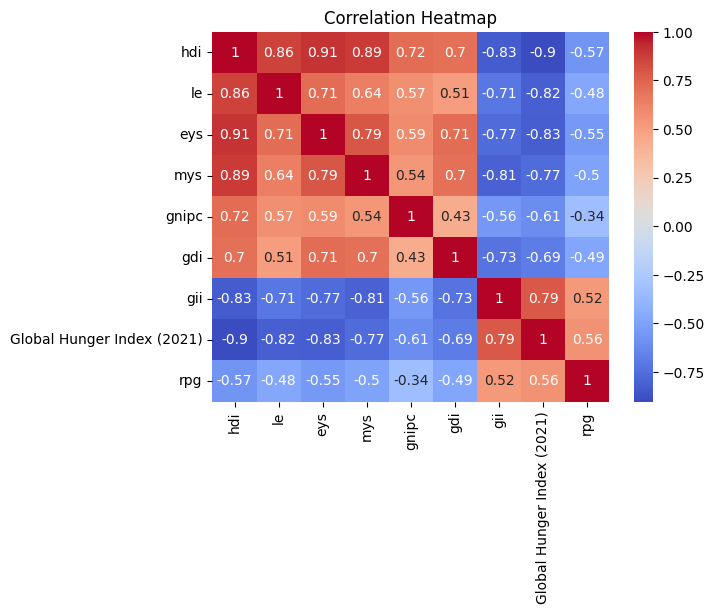

In [118]:
subset = X_combined_fpi_rpg[['hdi', 'le', 'eys', 'mys', 'gnipc', 'gdi', 'gii','Global Hunger Index (2021)', 'rpg']]
corr_matrix = subset.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [119]:
subset_raw = X_combined_fpi_rpg[['le','eys','mys','gnipc','mmr','abr','co2_prod','mf','Global Hunger Index (2021)', 'rpg', 'sub_region', 'iso3']]
subset_index = X_combined_fpi_rpg[['hdi','gdi','gii','phdi','diff_hdi_phdi','Global Hunger Index (2021)','sub_region', 'iso3']]
print(subset.isnull().sum())

hdi                           14
le                             0
eys                           10
mys                           13
gnipc                          6
gdi                           37
gii                           46
Global Hunger Index (2021)     0
rpg                            5
dtype: int64


In [120]:
sub_list_raw = subset_raw['sub_region'].unique()

subset_grouped_raw = subset_raw.groupby(
    'sub_region').mean().reset_index()

In [121]:
sub_list_index = subset_index['sub_region'].unique()

subset_grouped_index = subset_index.groupby(
    'sub_region').mean().reset_index()

In [122]:
for region in sub_list_index:  
    print(region)
    for col in subset_index.columns.drop(['sub_region', 'iso3']):
        subset_index[col].fillna(value = subset_grouped_index[subset_grouped_index["sub_region"] == region][col].values[0], inplace=True) 
        print(col)


Southern Asia
hdi
gdi
gii
phdi
diff_hdi_phdi
Global Hunger Index (2021)
Middle Africa
hdi
gdi
gii
phdi
diff_hdi_phdi
Global Hunger Index (2021)
Southern Europe
hdi
gdi
gii
phdi
diff_hdi_phdi
Global Hunger Index (2021)
Western Asia
hdi
gdi
gii
phdi
diff_hdi_phdi
Global Hunger Index (2021)
South America
hdi
gdi
gii
phdi
diff_hdi_phdi
Global Hunger Index (2021)
Eastern Africa
hdi
gdi
gii
phdi
diff_hdi_phdi
Global Hunger Index (2021)
Western Africa
hdi
gdi
gii
phdi
diff_hdi_phdi
Global Hunger Index (2021)
Eastern Europe
hdi
gdi
gii
phdi
diff_hdi_phdi
Global Hunger Index (2021)
Southern Africa
hdi
gdi
gii
phdi
diff_hdi_phdi
Global Hunger Index (2021)
Eastern Asia
hdi
gdi
gii
phdi
diff_hdi_phdi
Global Hunger Index (2021)
Central America
hdi
gdi
gii
phdi
diff_hdi_phdi
Global Hunger Index (2021)
Caribbean
hdi
gdi
gii
phdi
diff_hdi_phdi
Global Hunger Index (2021)
Northern Africa
hdi
gdi
gii
phdi
diff_hdi_phdi
Global Hunger Index (2021)
Northern Europe
hdi
gdi
gii
phdi
diff_hdi_phdi
Global Hunge

/tmp/ipykernel_17307/1679637366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_index[col].fillna(value = subset_grouped_index[subset_grouped_index["sub_region"] == region][col].values[0], inplace=True)
/tmp/ipykernel_17307/1679637366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_index[col].fillna(value = subset_grouped_index[subset_grouped_index["sub_region"] == region][col].values[0], inplace=True)
/tmp/ipykernel_17307/1679637366.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [123]:
print(subset_raw.isna().sum())

le                             0
eys                           10
mys                           13
gnipc                          6
mmr                            0
abr                            0
co2_prod                       0
mf                            70
Global Hunger Index (2021)     0
rpg                            5
sub_region                     0
iso3                           0
dtype: int64


In [124]:
subset_raw.head()

,le,eys,mys,gnipc,mmr,abr,co2_prod,mf,Global Hunger Index (2021),rpg,sub_region,iso3
0,55.2978,5.529050,1.407806,984.997434,1450.0,152.572,0.036462,2.28,50.9,1.325806,Southern Asia,AFG
1,58.6844,7.926956,1.776703,1518.767846,1120.0,126.106,0.061870,1.53,42.7,3.875415,Southern Asia,AFG
2,59.1113,8.193494,1.858825,1811.166659,1090.0,125.858,0.083711,1.53,38.7,1.525627,Southern Asia,AFG
3,61.9230,9.577323,2.209473,2125.862821,858.0,111.286,0.327922,1.86,34.3,3.798483,Southern Asia,AFG
4,62.5451,10.174350,2.313755,2178.507021,786.0,101.454,0.232967,1.66,30.6,3.374206,Southern Asia,AFG


In [125]:
subset.describe(
    
)

,hdi,le,eys,mys,gnipc,gdi,gii,Global Hunger Index (2021),rpg
count,698.000000,712.000000,702.000000,699.000000,706.000000,675.000000,666.000000,712.000000,707.000000
mean,0.633562,67.022000,11.687974,7.138873,10338.517388,0.917193,0.460692,19.386376,0.523308
std,0.138581,8.051771,2.726941,3.037135,10581.038490,0.082124,0.158552,12.896302,1.683978
min,0.287000,42.913600,2.971890,0.559420,610.655581,0.496000,0.093000,2.500000,-9.911333
25%,0.512000,61.755375,9.893059,4.708985,3092.253802,0.874000,0.344250,8.600000,-0.465397
50%,0.664000,69.058250,12.055153,7.142046,7631.943262,0.938000,0.477000,16.450000,0.538814
75%,0.749750,73.558700,13.700768,9.773773,14074.310467,0.977000,0.587000,28.400000,1.640671
max,0.890000,79.472600,18.338221,13.548430,87527.317670,1.042000,0.820000,65.100000,15.943176


In [126]:
np.unique(subset_raw['sub_region'])

array(['Caribbean', 'Central America', 'Central Asia', 'Eastern Africa',
       'Eastern Asia', 'Eastern Europe', 'Melanesia', 'Middle Africa',
       'Northern Africa', 'Northern Europe', 'South America',
       'South-Eastern Asia', 'Southern Africa', 'Southern Asia',
       'Southern Europe', 'Western Africa', 'Western Asia'], dtype=object)

# Qual a normalização que iremos usar? 


In [ ]:
# plt.figure(figsize = (15,15))
# plt.subplot(4,2,1)
# plt.boxplot(subset['le'])
# plt.subplot(4,2,2)
# plt.boxplot(subset['eys'])
# plt.subplot(4,2,3)
# plt.boxplot(subset['mys'])
# plt.subplot(4,2,4)
# plt.boxplot(subset['gnipc'])
# plt.subplot(4,2,5)
# plt.boxplot(subset['gdi'])
# plt.subplot(4,2,6)
# plt.boxplot(subset['gii'])
# plt.subplot(4,2,7)
# plt.boxplot(subset['rpg'])

### Presença de outlier --> Ecoder: RobustScaler
### SubRegion (todos os mesmos pesos) --> Encoder: OneHotEncoder
## Próximos passos
### Dropar a iso 
### Dividir o X e y
### aplicar a normalização
### Aplicação de modelo
### 1.Linear como baseline
### 2.Xboost (deep learning) --> Usado pelo site:  Vai superar ou não a regressão linear?
### 3.Decision Tree



In [127]:
data_set_raw =subset_raw.drop('iso3', axis=1)
data_set_raw.head()

,le,eys,mys,gnipc,mmr,abr,co2_prod,mf,Global Hunger Index (2021),rpg,sub_region
0,55.2978,5.529050,1.407806,984.997434,1450.0,152.572,0.036462,2.28,50.9,1.325806,Southern Asia
1,58.6844,7.926956,1.776703,1518.767846,1120.0,126.106,0.061870,1.53,42.7,3.875415,Southern Asia
2,59.1113,8.193494,1.858825,1811.166659,1090.0,125.858,0.083711,1.53,38.7,1.525627,Southern Asia
3,61.9230,9.577323,2.209473,2125.862821,858.0,111.286,0.327922,1.86,34.3,3.798483,Southern Asia
4,62.5451,10.174350,2.313755,2178.507021,786.0,101.454,0.232967,1.66,30.6,3.374206,Southern Asia


In [128]:
y_raw=data_set_raw[['Global Hunger Index (2021)']]
X_raw = data_set_raw.drop(columns="Global Hunger Index (2021)")

In [129]:
data_set_index =subset_index.drop('iso3', axis=1)
y_index=data_set_index[['Global Hunger Index (2021)']]
X_index = data_set_index.drop(columns="Global Hunger Index (2021)")

In [ ]:
X.head()

In [ ]:
y.head()

## Construção de Pipe

In [130]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)
X_train_index, X_test_index, y_train_index, y_test_index = train_test_split(X_index, y_index, test_size=0.2, random_state=42)

In [131]:
preprocessor_raw = ColumnTransformer(
    transformers=[
        ('numeric', RobustScaler(), ['le','eys','mys','gnipc','mmr','abr','co2_prod','mf', 'rpg']),
        ('categorical', OneHotEncoder(),['sub_region'])
    ])

preprocessor_index = ColumnTransformer(
    transformers=[
        ('numeric', RobustScaler(), ['hdi','gdi','gii','phdi','diff_hdi_phdi']),
        ('categorical', OneHotEncoder(),['sub_region'])
    ])

In [ ]:


# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# pipe_prep = Pipeline([ ('preprocessor', preprocessor)])

pipeline

In [ ]:
# pipe_prep.fit_transform(X_train)

In [ ]:
X_train.head()

In [ ]:
X_train.describe

In [ ]:
y_train

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
# Predict using the trained pipeline
predictions = pipeline.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(pipeline,X,y,cv = 5)
score.mean()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

# Modelo Regressão linear/Baseline 
## R²=0,726/0,653 ; 
## MAE = 4,179; 
## RMSE = 7,700; 
## MSE= 59,292

In [ ]:
from sklearn.tree import DecisionTreeRegressor

pipeline_DT = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor())
])

pipeline_DT.fit(X_train,y_train)
pipeline_DT.predict(X_test)

In [ ]:
score = cross_val_score(pipeline_DT,X,y,cv = 5)
score.mean()

In [ ]:
predictions_DT = pipeline_DT.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, predictions_DT)
rmse = mean_squared_error(y_test, predictions_DT, squared=False)
mae = mean_absolute_error(y_test, predictions_DT)
r2 = r2_score(y_test, predictions_DT)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

# modelo de Decision Tree 
## R²=0,576/0,806
## MAE = 3,847
## RMSE = 5,760
## MSE = 33,181

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Create a function to build the Keras model
def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim= 25))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Create the KerasRegressor
regressor = KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0)

# Create the pipeline
pipeline_DL = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# Fit the pipeline to your training data
pipeline_DL.fit(X_train, y_train)

# Make predictions on the test data
predictions_DL = pipeline_DL.predict(X_test)

# Compute evaluation metrics
mse = mean_squared_error(y_test, predictions_DL)
rmse = mean_squared_error(y_test, predictions_DL, squared=False)
mae = mean_absolute_error(y_test, predictions_DL)
r2 = r2_score(y_test, predictions_DL)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


In [ ]:
pipeline_DL

In [ ]:
from sklearn.metrics import make_scorer
scoring = make_scorer(mean_squared_error, squared=False)
cv_scores = cross_val_score(pipeline, X, y, scoring=scoring, cv=5)

# Print the cross-validation scores
print("Cross-Validation RMSE Scores:", cv_scores)
print("Mean RMSE:", np.mean(cv_scores))

# Modelo Deep Learning/Redes neurais com Sequential/KerasRegressor
## R² = 0,74
## RMSE= 6,04
## MAE = 3,91
## MSE = 44,50

# Testando o modelo com Raw data

In [ ]:
X_train_raw.head()

In [132]:
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Criar o modelo XGBoost
model_raw = xgb.XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)

# Criar o pipeline
pipeline_XGB_raw = Pipeline([
    ('preprocessor', preprocessor_raw),
    ('model', model_raw)
])

# Ajustar o pipeline aos dados de treinamento
pipeline_XGB_raw.fit(X_train_raw, y_train_raw)

# Fazer previsões nos dados de teste
predictions_XGB_raw = pipeline_XGB_raw.predict(X_test_raw)

# Calcular as métricas de avaliação
mse = mean_squared_error(y_test_raw, predictions_XGB_raw)
rmse = mean_squared_error(y_test_raw, predictions_XGB_raw, squared=False)
mae = mean_absolute_error(y_test_raw, predictions_XGB_raw)
r2 = r2_score(y_test_raw, predictions_XGB_raw)

# Imprimir as métricas de avaliação
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)



Mean Squared Error (MSE): 20.319320946634868
Root Mean Squared Error (RMSE): 4.507695746901611
Mean Absolute Error (MAE): 2.9808166430546685
R-squared (R2) Score: 0.8929961096832122


0.7861207910909209

In [133]:
cv_results_raw = cross_validate(pipeline_XGB_raw, X_raw, y_raw, cv=5, scoring='r2')
cv_results_raw['test_score'].mean()


0.7694181309403026

# modelo com raw completo
Mean Squared Error (MSE): 20.712814395298658
Root Mean Squared Error (RMSE): 4.551133308891166
Mean Absolute Error (MAE): 3.4956480543236985
R-squared (R2) Score: 0.8905971148314779

In [ ]:
new = data_set_raw.iloc[: 6]
new_df = pd.DataFrame(new)

In [ ]:
new_df

In [ ]:
new_1 = new_df.drop(columns=['Global Hunger Index (2021)'])
new_1

In [ ]:
new_line = data_set_raw.iloc[: 4:5]
new_df = pd.DataFrame(new_line)
new_df

In [ ]:
new_df['pr_f']=20
new_df['pr_m']=25
new_df['le']=46
new_df['eys']=4.6

new_1 = new_df.drop(columns=['Global Hunger Index (2021)'])
new_1

In [ ]:
pipeline_XGB_raw.predict(new_1)

# Testando modelo com o Raw simplificado

Mean Squared Error (MSE): 23.34206979509036
Root Mean Squared Error (RMSE): 4.831363140469816
Mean Absolute Error (MAE): 3.6076831847742987
R-squared (R2) Score: 0.8767096671340071
0.7994722096919498

# Testando modelo com mais 2 anos

In [ ]:
model_raw = xgb.XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)

# Criar o pipeline
pipeline_XGB_raw = Pipeline([
    ('preprocessor', preprocessor_raw),
    ('model', model_raw)
])

# Ajustar o pipeline aos dados de treinamento
pipeline_XGB_raw.fit(X_train_raw, y_train_raw)

# Fazer previsões nos dados de teste
predictions_XGB_raw = pipeline_XGB_raw.predict(X_test_raw)

# Calcular as métricas de avaliação
mse = mean_squared_error(y_test_raw, predictions_XGB_raw)
rmse = mean_squared_error(y_test_raw, predictions_XGB_raw, squared=False)
mae = mean_absolute_error(y_test_raw, predictions_XGB_raw)
r2 = r2_score(y_test_raw, predictions_XGB_raw)

# Imprimir as métricas de avaliação
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

cv_results_raw = cross_validate(pipeline_XGB_raw, X_raw, y_raw, cv=10, scoring='r2')
cv_results_raw['test_score'].mean()

# Testando modelo com Índices

In [ ]:
model_index = xgb.XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)

# Criar o pipeline
pipeline_XGB_index = Pipeline([
    ('preprocessor', preprocessor_index),
    ('model', model_index)
])

# Ajustar o pipeline aos dados de treinamento
pipeline_XGB_index.fit(X_train_index, y_train_index)

# Fazer previsões nos dados de teste
predictions_XGB_index = pipeline_XGB_index.predict(X_test_index)

# Calcular as métricas de avaliação
mse = mean_squared_error(y_test_index, predictions_XGB_index)
rmse = mean_squared_error(y_test_index, predictions_XGB_index, squared=False)
mae = mean_absolute_error(y_test_index, predictions_XGB_index)
r2 = r2_score(y_test_index, predictions_XGB_index)

# Imprimir as métricas de avaliação
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

cv_results_index = cross_validate(pipeline_XGB_index, X_index, y_index, cv=10, scoring='r2')
cv_results_index['test_score'].mean()

In [ ]:
pipeline_XGB.named_steps.items()

In [134]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'model__max_depth': [5, 10, 15],
    'model__n_estimators': [50, 100, 150],
    'model__learning_rate': [0.1, 0.01, 0.001],
    'model__booster': ['gbtree', 'gblinear']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=pipeline_XGB_raw,
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the training data
grid_search.fit(X_train_raw, y_train_raw)

grid_search.best_params_

Fitting 10 folds for each of 54 candidates, totalling 540 fits
[21:52:10] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone_constraints", "num_parallel_tree", "predictor", "sampling_method", "subsample", "tree_method" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[21:52:10] WARNING: ../src/learner.cc:627: 
Parameters: { "colsample_bylevel", "colsample_bynode", "colsample_bytree", "gamma", "grow_policy", "interaction_constraints", "max_bin", "max_cat_to_onehot", "max_delta_step", "max_depth", "max_leaves", "min_child_weight", "monotone

{'model__booster': 'gbtree',
 'model__learning_rate': 0.1,
 'model__max_depth': 5,
 'model__n_estimators': 150}

In [135]:
model_raw_final = grid_search.best_estimator_
model_raw_final

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric', RobustScaler(),
                                                  ['le', 'eys', 'mys', 'gnipc',
                                                   'mmr', 'abr', 'co2_prod',
                                                   'mf', 'rpg']),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['sub_region'])])),
                ('model',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds...
                              enable_categorical=False, eval_metric=None,
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.1, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=5, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=150, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [136]:
import joblib

joblib.dump(model_raw_final, '/home/giovane/HITW_MAIN/HITW_MAIN/xgbmodel.pkl')

['/home/giovane/HITW_MAIN/HITW_MAIN/xgbmodel.pkl']

In [ ]:
model.predict(X_test).tolist()